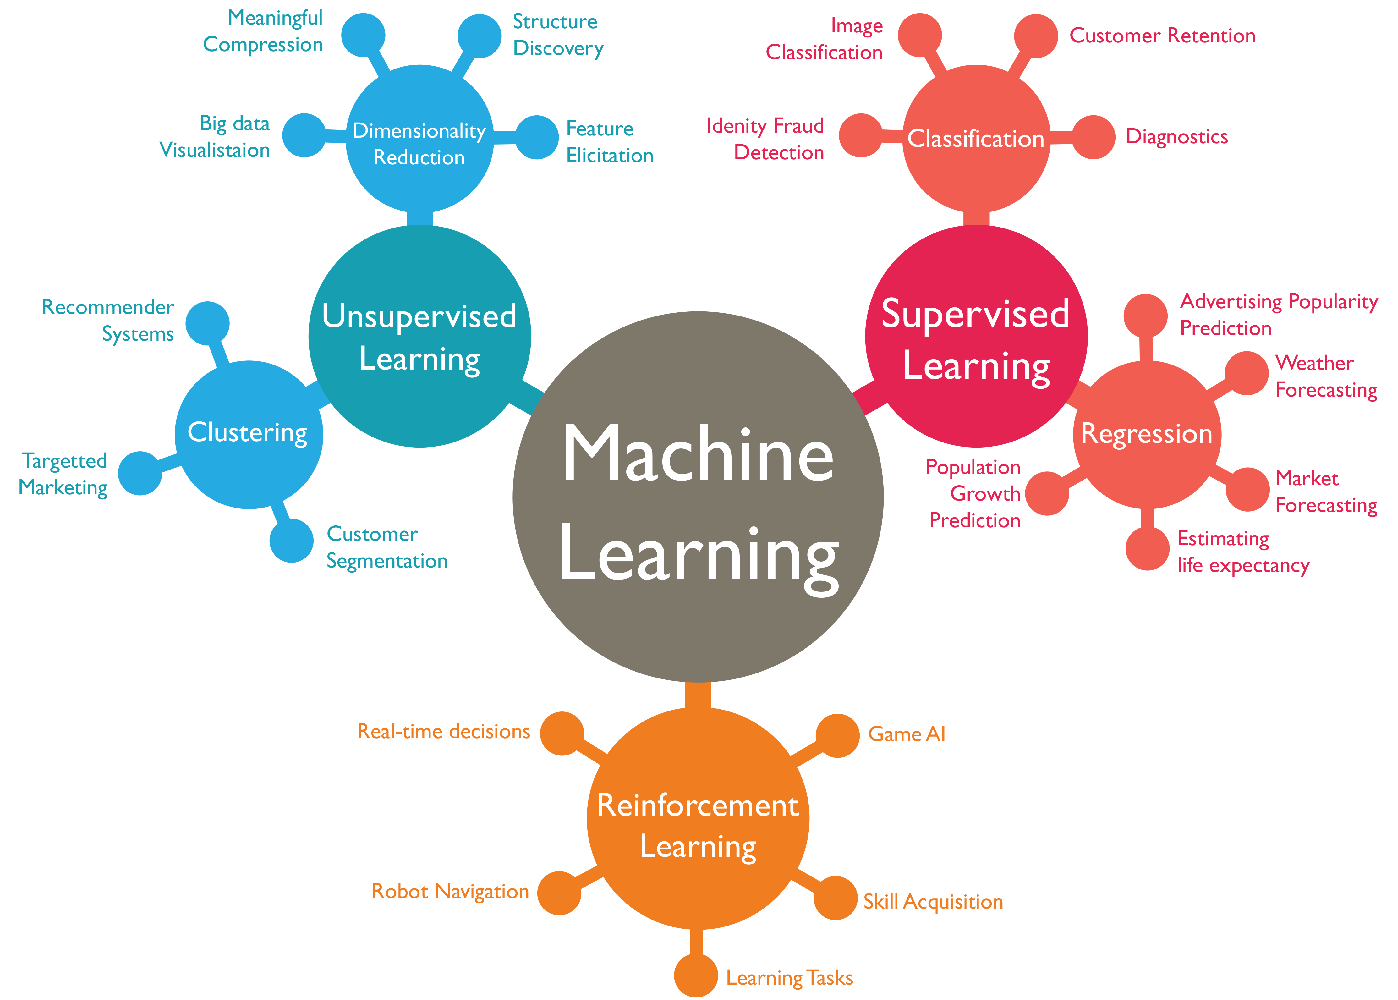

#1. Nəzarətli (Supervised) Öyrənmə
##Tərif: Bu öyrənmə növündə modelə etiketli (cavabları bəlli) məlumat verilir. Model düzgün cavabları tapmaq üçün bu məlumat üzərində öyrənir.
**İstifadə Sahələri: Sinifləndirmə (məsələn, spam e-poçtların tanınması), reqressiya (qiymətlərin proqnozlaşdırılması).**
###Əsas Alqoritmlər:
1. **Xətti Reqressiya**: Kəsilməz dəyərlərin proqnozu üçün.
2. **Logistik Reqressiya**: İki sinifə ayırma tapşırıqları üçün.
3. **Qərar Ağacları və Random Forest**: Həm sinifləndirmə, həm də reqressiya üçün.
4. **SVM (Dəstək Vektor Maşını)**: Siniflər arasında sərhədi tapır.

#2. Nəzarətsiz (Unsupervised) Öyrənmə
##Tərif: Etiketlənməmiş məlumatlarla işləyir, model heç bir hazır cavab olmadan məlumatda müəyyən qrupları və ya strukturları tapır.
**İstifadə Sahələri: Klasterləşmə (məsələn, müştəri qruplaşması), ölçü azaldılması (məlumatın sıxılması).**
###Əsas Alqoritmlər:
1. **K-Orta Klasterləşmə (K-Means)**: Məlumatı oxşarlığa əsasən K qrupda toplar.
2. **Hierarxik Klasterləşmə**: Ağac şəklində klaster qurur.
3. **Əsas Komponentlərin Analizi (PCA)**: Ölçü azaldılması üçün.
4. **Assosiasiya Qayda Öyrənməsi**: Əlaqələri tapır (məsələn, Apriori alqoritmi).

#3. Reinforcement Learning
##Tərif: Agent mühitlə qarşılıqlı əlaqə qurur, aldığı mükafat və ya cəzalar əsasında öyrənir. Məqsəd zamanla maksimal mükafatı əldə etməkdir.
**İstifadə Sahələri: Oyunlar, robototexnika, avtonom idarəetmə.**
###Əsas Alqoritmlər:
1. **Q-Öyrənmə**: Agent hər vəziyyətdə ən yaxşı addımı öyrənir.
2. **Dərin Q-Şəbəkələr (DQN)**: Q-öyrənməni dərin öyrənmə ilə birləşdirir.
3. **Politika Gradiyenti (Policy Gradient)**: Politikaları birbaşa optimallaşdırır.
4. **Proksimal Politika Optimallaşdırması (PPO)**: Sabitlik üçün çox istifadə olunur.


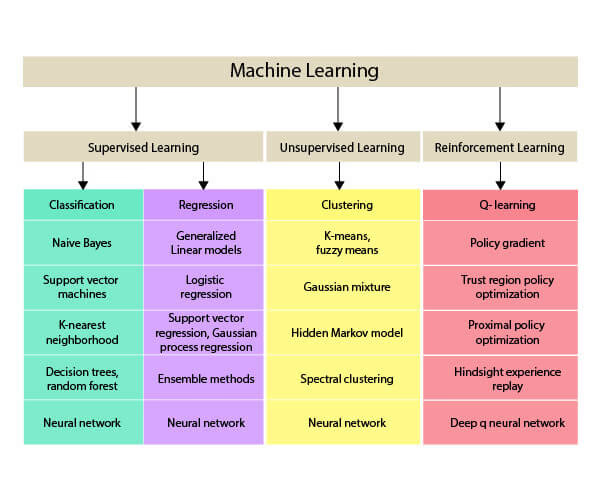

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/heart.csv')

#Məlumatlar
Bu məlumat bazasında xəstənin fiziki testi əsasında 14 fiziki atribut yer alır. Qan nümunələri götürülür və xəstə qısa bir idman testi də keçir. "Hədəf" sahəsi xəstədə ürək xəstəliyinin mövcudluğunu göstərir. Bu, integer formatında (0 xəstəliyin olmaması, 1 xəstəliyin mövcudluğu üçün) verilib. Ümumiyyətlə, bir xəstədə ürək xəstəliyinin olub-olmadığını tam təsdiq etmək üçün invaziv prosedurlar tələb oluna bilər, buna görə ürək xəstəliyi ehtimalını dəqiq proqnozlaşdıra bilən bir model yaratmaqla bahalı və invaziv prosedurlardan qaçmaq mümkündür.
Atribut məlumatları:

* yaş
* cins
* döş ağrısı tipi (4 dəyər)
* istirahət zamanı qan təzyiqi
* serum xolesterolu (mg/dl ilə)
* oruc zamanı qan şəkəri > 120 mg/dl
* istirahət zamanı elektrokardioqrafiya nəticələri (dəyərlər 0,1,2)
* əldə olunan maksimum ürək ritmi
* idman zamanı yaranan angina
* oldpeak = idman zamanı istirahətə nisbətdə yaranan ST depressiyası
* pik idman ST seqmentinin yamacı
* flüroskopiya ilə rənglənən əsas damarların sayı (0-3 arası)
* thal: 3 = normal; 6 = sabit qüsur; 7 = geri dönə bilən qüsur
* hədəf: 0 xəstəliyin olmaması, 1 xəstəliyin mövcudluğu


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()#target deyerinin nece ferqli deyer ala bildiyi ucun

array([1, 0])

In [6]:
df.info()#esas null deyerleri yoxlamaq ucun

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<ipython-input-8-0b4c2a94bfc8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df, palette='viridis')#her target deyer sayini gostermek ucun countplot


<Axes: xlabel='target', ylabel='count'>

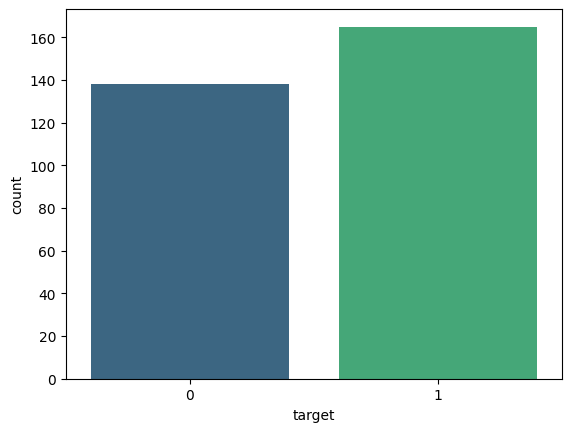

In [8]:
sns.countplot(x='target',data=df, palette='viridis')#her target deyer sayini gostermek ucun countplot

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Aşağıdakı sütunlar arasındakı əlaqələri göstərən pairplot:**


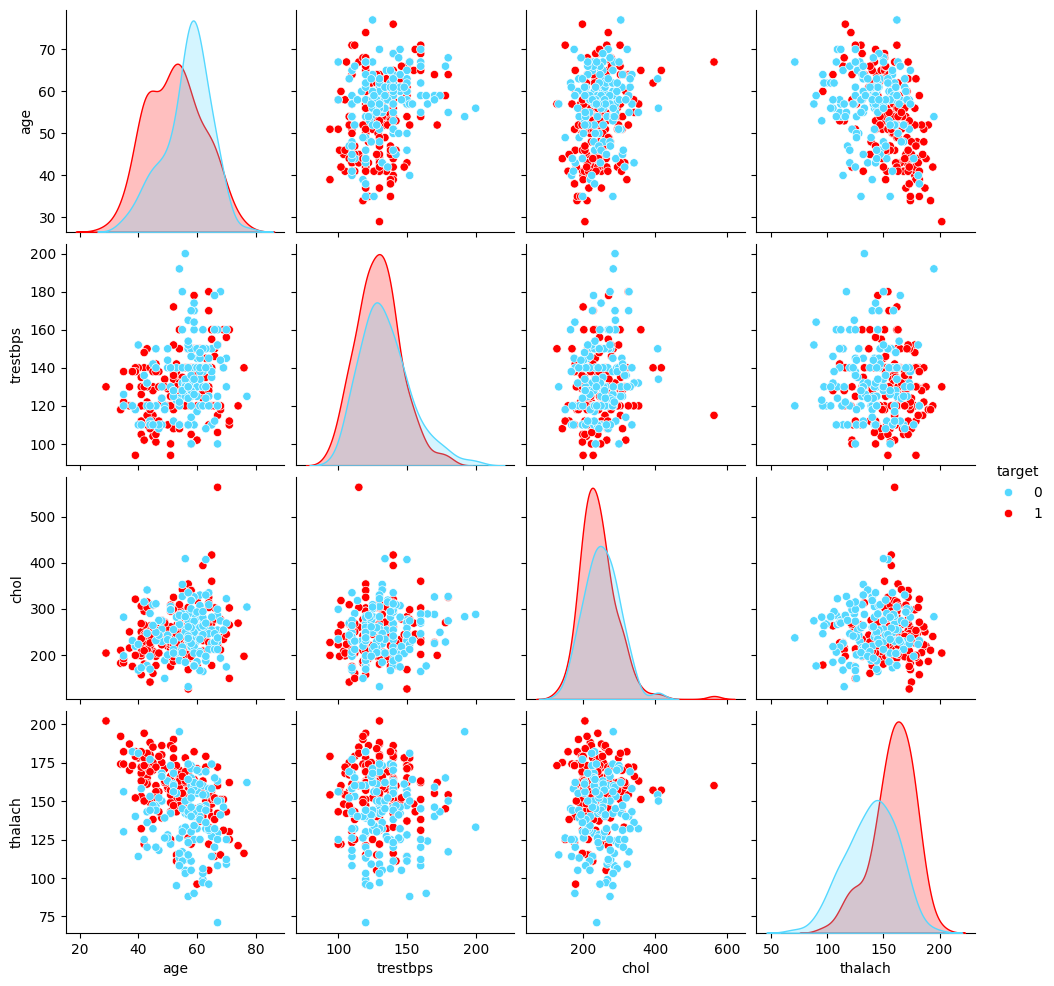

In [38]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']],
             hue='target',
             palette=['#55d8ff', 'red'])


**Bütün sütunlar arasında əlaqəni göstərən heatmap**


<Axes: >

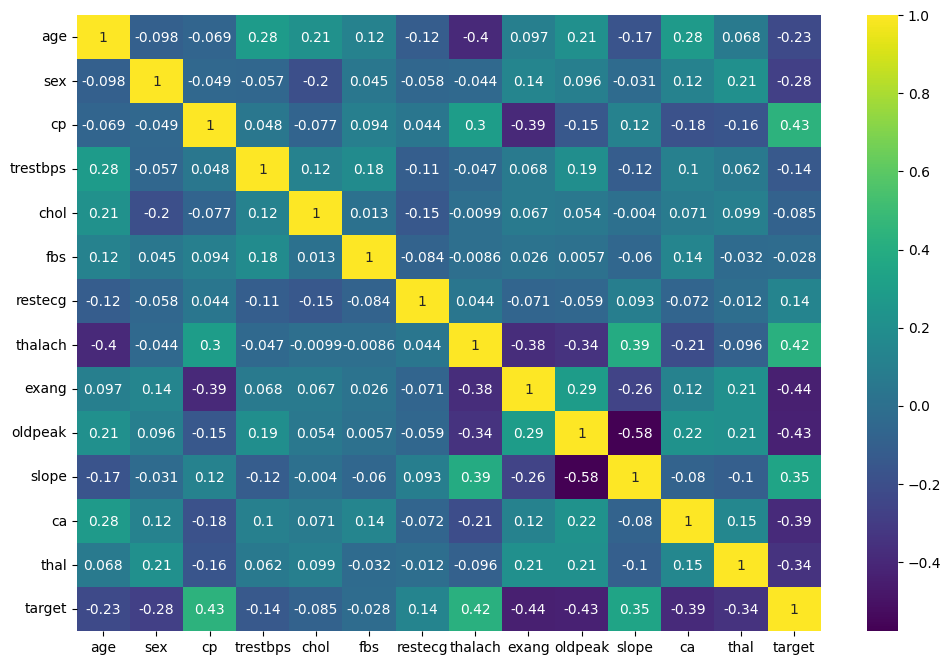

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

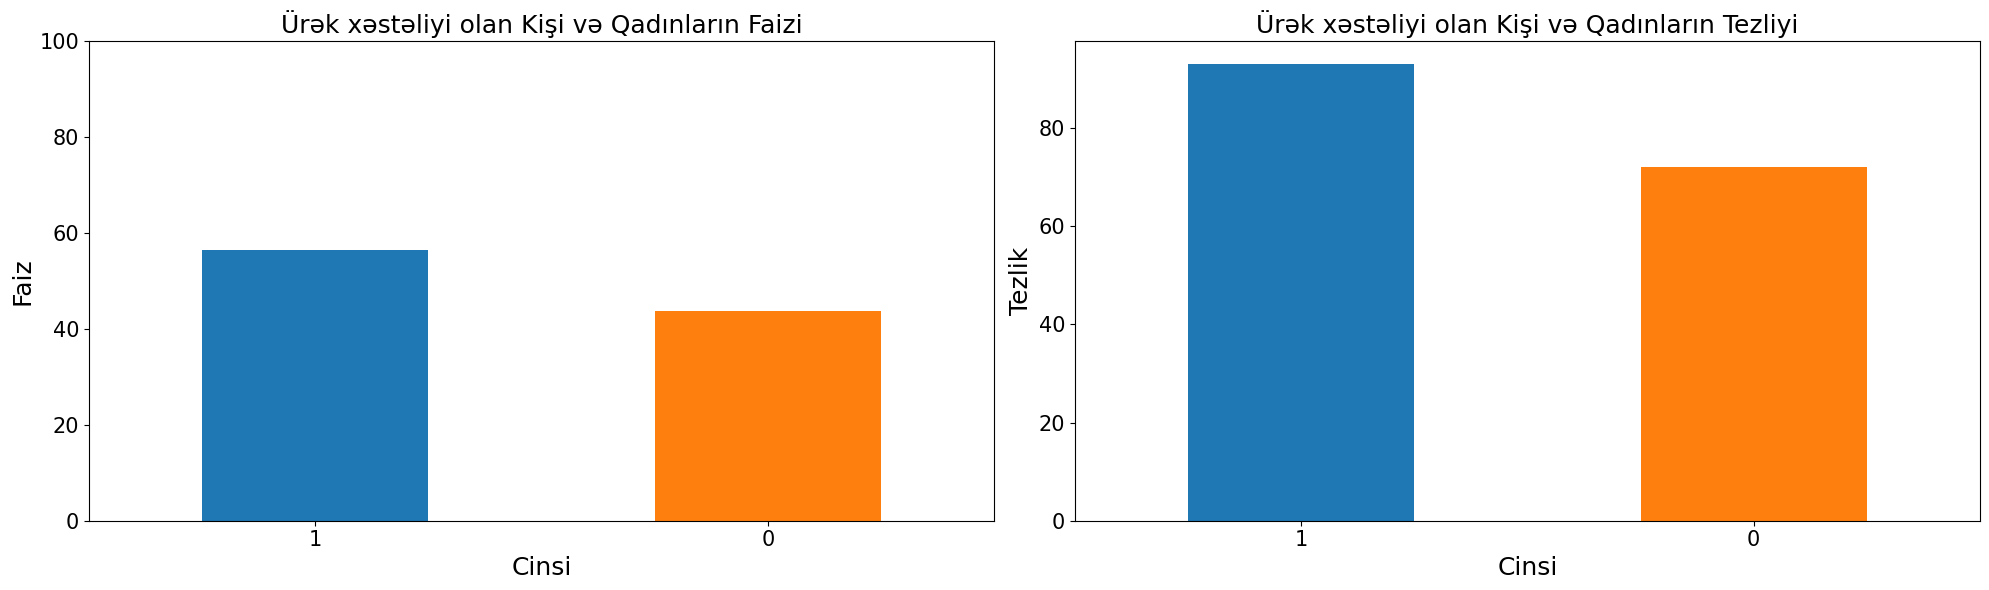

In [12]:
# İki alt-şəkil olan bir fiqur yaradırıq
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))

# Ürək xəstəliyi olan kişi və qadınların faizini qrafiklə göstəririk
((df[df['target'] == 1]['sex'].value_counts() / len(df[df['target'] == 1])) * 100).plot.bar(
    rot=0,
    fontsize=15,
    color=['#1f77b4', '#ff7f0e'],
    title='Kişi və Qadınların Faizi',
    ax=axarr[0]
)

# Birinci alt-şəklin başlığını, x-oxu və y-oxu etiketlərini, habelə y-oxu limitlərini təyin edirik
axarr[0].set_title('Ürək xəstəliyi olan Kişi və Qadınların Faizi', fontsize=18)
axarr[0].set_xlabel("Cinsi", fontsize=18)
axarr[0].set_ylabel("Faiz", fontsize=18)
axarr[0].set_ylim([0, 100])

# Ürək xəstəliyi olan kişi və qadınların tezliyini qrafiklə göstəririk
df[df['target'] == 1]['sex'].value_counts().plot.bar(
    rot=0,
    fontsize=15,
    color=['#1f77b4', '#ff7f0e'],
    title='Ürək xəstəliyi olan Kişi və Qadınların Tezliyi',
    ax=axarr[1]
)

# İkinci alt-şəklin başlığını, x-oxu və y-oxu etiketlərini təyin edirik
axarr[1].set_title('Ürək xəstəliyi olan Kişi və Qadınların Tezliyi', fontsize=18)
axarr[1].set_xlabel("Cinsi", fontsize=18)
axarr[1].set_ylabel("Tezlik", fontsize=18)

# Şəkillərin düzgün yerləşməsi üçün düzəlişlər edirik
plt.tight_layout()

# Şəkili göstəririk
plt.show()

#  Məlumat çərçivəsində kişilər 1, qadınlar 0 ilə təmsil olunur

In [13]:
X = df.drop('target',axis=1)
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
scaler = StandardScaler()

#Dataset-in train ve test hissələri ayrılmasış Bu hissələr modelin tam hazırlanması üçün şox önəmlidir

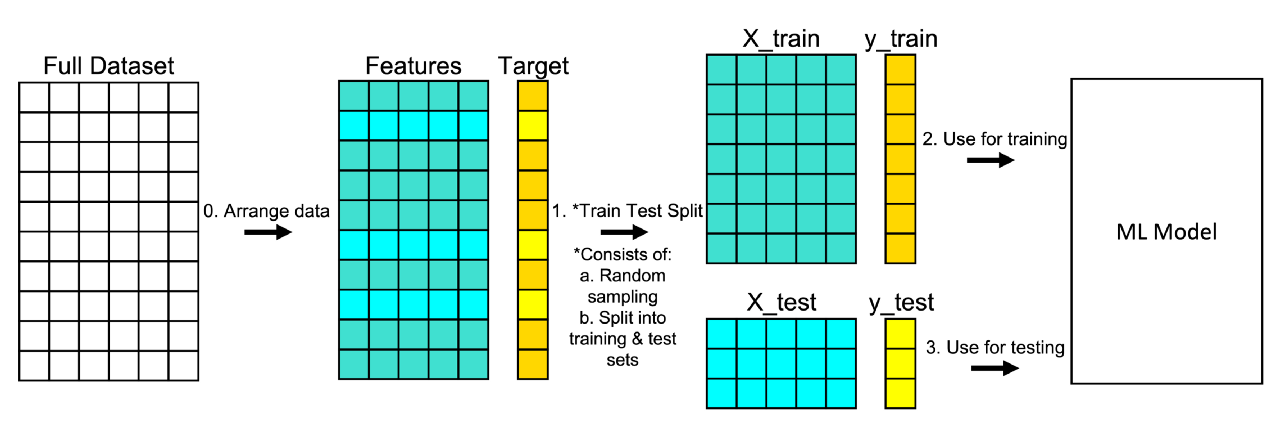

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Logistic Regresiya

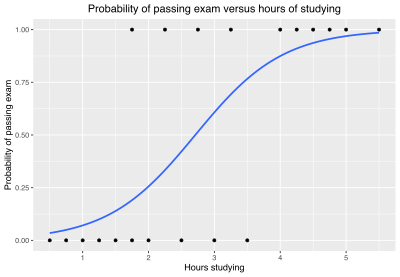

**Logistik regresiya, iki və ya daha çox sinfi ayırmaq üçün istifadə olunan statistik bir modeldir. Bu model, müstəqil dəyişənlərin bir və ya bir neçə asılı dəyişən üzərindəki təsirini qiymətləndirir və nəticəni ehtimal (0 ilə 1 arasında) şəklində təqdim edir. Adətən, 0 və 1 olaraq iki sinfi ayıran bir hədd müəyyən edilir, bu da onu ikili təsnifat problemlərində populyar edir. Logistik regresiya, səhiyyə, maliyyə və marketinq kimi sahələrdə geniş istifadə olunur.**

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [19]:
log_model = LogisticRegressionCV()

In [20]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

 **Kiçik bir C dəyəri, daha güclü tənzimləmə (overfitting'i azaltmaq üçün) deməkdir, yəni model daha sadə olacaq. Böyük bir C dəyəri isə tənzimləməni zəiflədir, model daha mürəkkəb və daha dəqiq ola bilər, lakin overfitting riskini artırır.**

In [21]:
log_model.C_

array([0.04641589])

In [22]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

**Hər bir koeffisiyent, müstəqil dəyişənin bir vahid artmasının asılı dəyişənin ehtimalına olan təsirini göstərir. Müsbət bir koeffisiyent, müstəqil dəyişənin artması halında hədəf ehtimalının artacağını, mənfi bir koeffisiyent isə ehtimalın azaldığını göstərir.**

In [23]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

<ipython-input-24-4bb76fa47604>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index, y=coefs.values, palette='coolwarm')


<Axes: xlabel='None'>

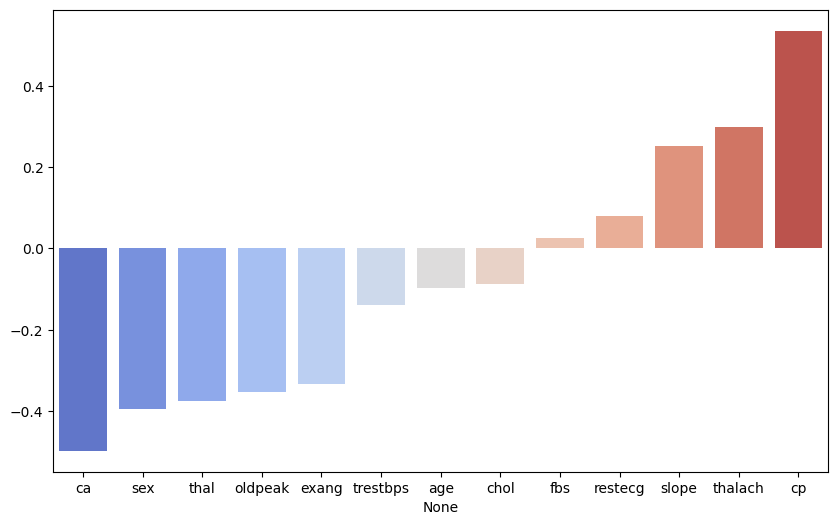

In [24]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index, y=coefs.values, palette='coolwarm')


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [26]:
y_pred = log_model.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

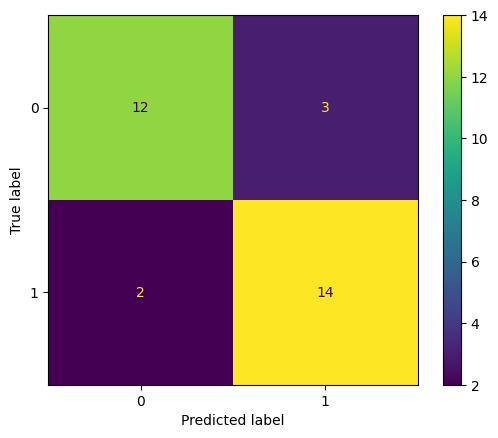

In [28]:
from sklearn.metrics import  ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot(cmap="viridis")
plt.show()

# Precision-Recall Əyrisi İzahedici Qısa Məlumat

Bu qrafik **Precision-Recall** əyrisini göstərir. Burada:

- **Precision (Dəqiqlik)** – modelin müsbət təsbitlərinin nə qədərinin düzgün olduğunu göstərir (Y-oxu).
- **Recall (Geri Çağırış)** – əsl müsbətlərin nə qədərinin düzgün tapıldığını göstərir (X-oxu).
- **AP (Average Precision) = 0.97** – modelin ümumi dəqiqlik və geri çağırış performansını ölçür, burada 0.97 yüksək performans deməkdir.

Qrafikdə xəttin yüksəkdə qalması modelin həm dəqiq, həm də yaxşı geri çağırış göstəricisinə malik olduğunu bildirir.


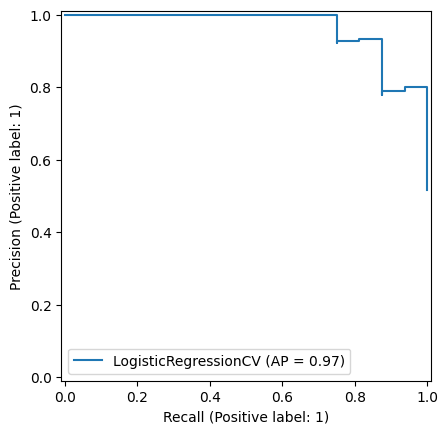

In [29]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.show()
#musbet target deyerini secmeye meyillidi


Bu qrafik **ROC (Receiver Operating Characteristic)** əyrisini göstərir. Qrafik modelin təsnifat performansını aşağıdakı şəkildə qiymətləndirir:

- **True Positive Rate (Həqiqi Müsbət Sürət)** - Y-oxunda göstərilir və modelin həqiqi müsbət hallarını tapmaq qabiliyyətini ifadə edir.
- **False Positive Rate (Yalnış Müsbət Sürət)** - X-oxunda göstərilir və yalnış müsbət hallar yaradılma ehtimalını göstərir.
- **AUC (Area Under Curve)** = **0.96** – Bu dəyər əyri altındakı sahəni göstərir və modelin güclü performansa malik olduğunu ifadə edir (**1**-ə yaxın olduqca yaxşıdır).


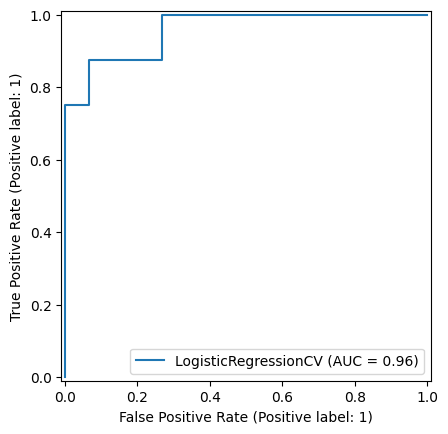

In [30]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.show()


In [31]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]
X_test.iloc[-1]

,268
age,54.0
sex,1.0
cp,0.0
trestbps,122.0
chol,286.0
fbs,0.0
restecg,0.0
thalach,116.0
exang,1.0
oldpeak,3.2


In [32]:
y_test.iloc[-1]

0

In [33]:
log_model.predict(patient)

array([0])

In [34]:
log_model.predict_proba(patient)
#Xəstə birinci sinfə aid olma ehtimalı çox yüksəkdir.

array([[9.99999860e-01, 1.39946031e-07]])